In [2]:
import pandas as pd
import pandas_datareader as pdr
import datetime
tickers=['EDPR.LS','GRN.MC','RWE.DE','EONGY']
startdate=datetime.datetime(2020,1,1)
enddate=datetime.datetime(2020,6,15)
def get(tickers,startdate,enddate):
    def data(ticker):
        return(pdr.get_data_yahoo(ticker,start=startdate,end=enddate))
    datas=map(data,tickers)
    return(pd.concat(datas,keys=tickers,names=['Ticker','Date']))

We will analyze the behaviour of different european renewable energy stocks during theyear 2020. The main objective of the analysis is to see if the investment in  european renewable energy in 2020 is profitable. With that objective in mind we will create a normalized index with the closing price of the different stocks. The companies are: EDP renováveis, Greenalia, Eon and RWE AG. 

In [3]:
data=get(tickers,startdate,enddate)

The data is obtained from yahoo finance

In [4]:
print(data)

                     High    Low   Open  Close    Volume  Adj Close
Ticker  Date                                                       
EDPR.LS 2020-01-02  10.50  10.36  10.48  10.38   79553.0  10.300460
        2020-01-03  10.38  10.18  10.38  10.26  145602.0  10.181379
        2020-01-06  10.28  10.20  10.28  10.26  100336.0  10.181379
        2020-01-07  10.30  10.16  10.30  10.20  122527.0  10.121839
        2020-01-08  10.20  10.00  10.16  10.20  153327.0  10.121839
        2020-01-09  10.18  10.04  10.10  10.16  218590.0  10.082146
        2020-01-10  10.30  10.14  10.14  10.30  126444.0  10.221073
        2020-01-13  10.42  10.24  10.30  10.42  684624.0  10.340154
        2020-01-14  10.64  10.40  10.40  10.60  178050.0  10.518774
        2020-01-15  10.82  10.60  10.64  10.70  297628.0  10.618008
        2020-01-16  10.82  10.56  10.70  10.78  417137.0  10.697394
        2020-01-17  10.88  10.72  10.78  10.82  293586.0  10.737088
        2020-01-20  10.88  10.74  10.88  10.78  

In [5]:
Adj_Close=data.pivot_table(values='Adj Close',index='Date',columns='Ticker')

In [6]:
pct_change=Adj_Close.pct_change()

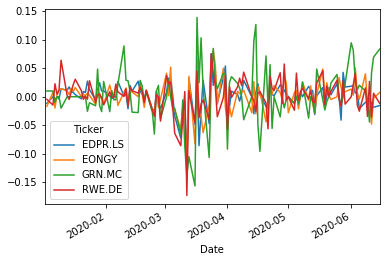

In [13]:
import matplotlib.pyplot as plt
pct_change.plot()
plt.show()

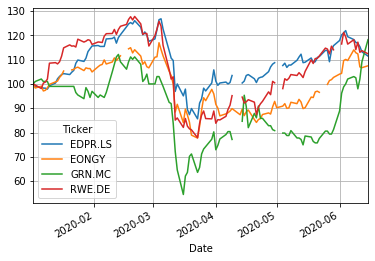

In [8]:
first=Adj_Close.iloc[0]
Normalized=Adj_Close.div(first).mul(100)
Normalized.plot(grid=True)

We can see from the previous image that despite the current pandemic the stocks for all the companies are higher than at the beggining of the year. We can say that the investment is profitable, let´s combine the different components to create the index

In [14]:

investment=[1000,1000,1000,1000]
pct_plus_one=pct_change.add(1)
cum_change=pct_plus_one.cumprod().mul(investment)


In the case we have invested 1000 euros in each of the stocks the portfolio value would look like the next plot:

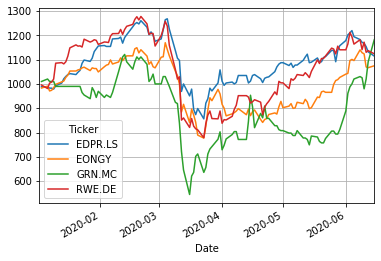

In [15]:
cum_change.plot(grid=True)

Let´s check the correlation among the percentage change in the closing price of the different stocks.
The next couple of images show us that the correlation is high. In the case we want to reduce the risk we should diversifie
the portfolio.


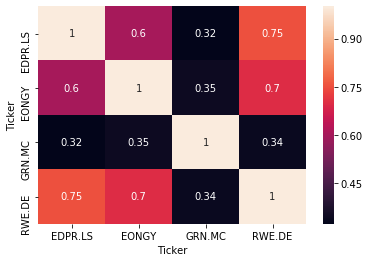

In [16]:
import seaborn as sns
sns.heatmap(pct_change.corr(),annot=True)

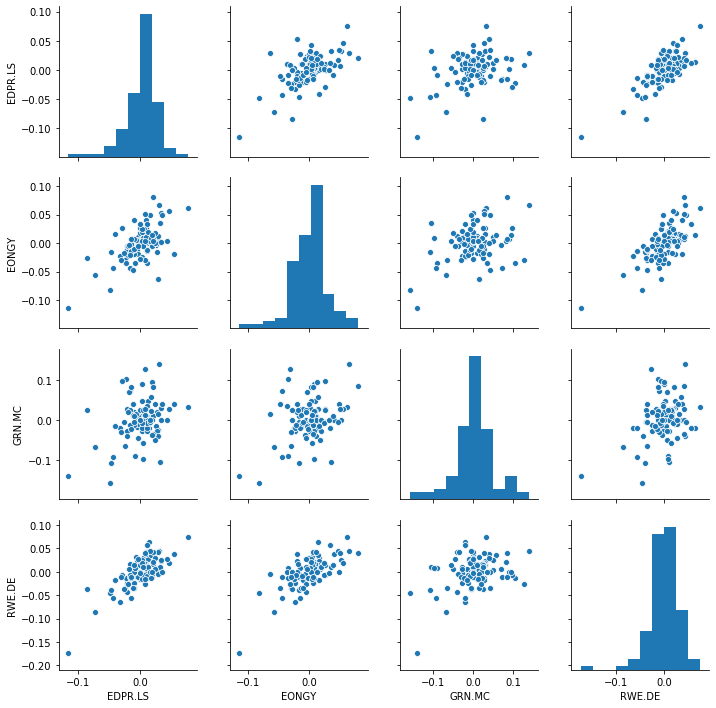

In [25]:
sns.pairplot(pct_change.iloc[1:])

In [27]:
final=cum_change.iloc[-1]
print(final)
final.sum()

Ticker
EDPR.LS    1114.513303
EONGY      1074.617899
GRN.MC     1181.818208
RWE.DE     1123.911307
Name: 2020-06-15 00:00:00, dtype: float64


4494.8607171232525

The final return would be 4494. The difference between the initial investment and the current situation is 494 Euros.

In [47]:
rolling_30=pct_change.mul(100).rolling(window=30).mean()

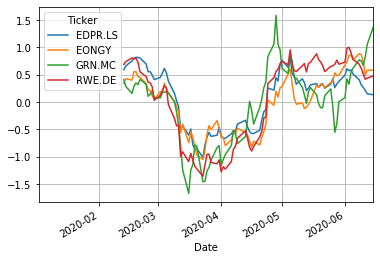

In [48]:
rolling_30.plot(grid=True)

Text(0.5, 1.0, 'Volatility 30 days')

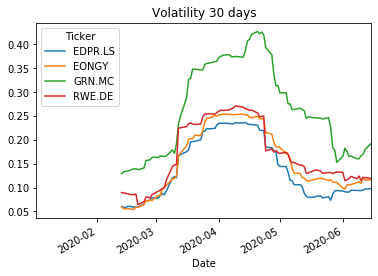

In [37]:
import numpy as np
rolling_volatility=pct_change.rolling(window=30).std()*np.sqrt(30)
rolling_volatility.plot()
plt.title('Volatility 30 days')


The previos image show us the volatility of the different components. A 30 day window was created in order to have a broader approach. We can see how at the beggining of the pandemic the volatility increased for all the stocks specially for Greenalia.

In the next steps the index will be created. The next images will show us the index and the normalized index. In both cases we can appreciate the impact of the pandemic in april and the later recovery of the prices.

In [31]:
cum_change_index=pct_plus_one.cumprod().mul(investment)
cum_change_index=cum_change_index.dropna()

Text(0.5, 1.0, 'Index Selected European Renewable Energy Stocks')

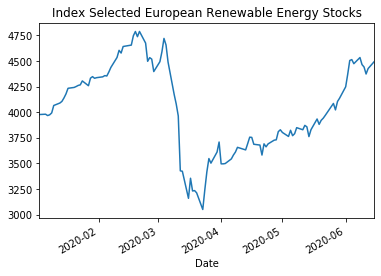

In [35]:
cum_change_index.sum(axis=1).plot()
plt.title('Index Selected European Renewable Energy Stocks')

Text(0.5, 1.0, 'Normalized Index')

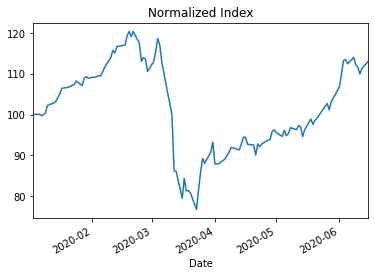

In [36]:
cum_change_index.div(cum_change_index.iloc[0].sum()).sum(axis=1).mul(100).plot()
plt.title('Normalized Index')